In [39]:
from textblob import TextBlob
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [40]:
def title_extract(file_name):
    """
    Extracts all article titles from txt files
    Input: a txt file (string)
    Output: article title names (list)
    """
    titles = []
    text_file = open(file_name,"r")
    for line in text_file:
        line = line.strip()
        titles.append(line)
    return titles

In [41]:
#Extract all article names from txt file
fox_titles = title_extract("fox.txt")
abc_titles = title_extract("abc.txt")
wsj_titles = title_extract("wsj.txt")
npr_titles = title_extract("npr.txt")
nyt_titles = title_extract("nytimes.txt")
washington_titles = title_extract("washington.txt")
huffpost_titles = title_extract("Huffpost.txt")
breit_titles = title_extract("breitbart.txt")
econ_titles = title_extract("economist.txt")
total_list = [fox_titles,abc_titles,wsj_titles,npr_titles,nyt_titles,washington_titles,huffpost_titles,breit_titles,econ_titles]

In [42]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [43]:
#see how pos/neg the titles are
def polar_subj(article_titles):
    """
    Takes each article title and determines the polarity & subjectivity 
    Input: list of article titles (list)
    Output: title_polarity (list), title_subj (list)
    """
    title_polarity = []
    title_subj = []
    for title in article_titles:
        blob = TextBlob(title)
        title_polarity.append(blob.sentiment.polarity)
        title_subj.append(blob.sentiment.subjectivity)
    return title_polarity, title_subj

In [44]:
fox_polar, fox_subj = polar_subj(fox_titles)
abc_polar, abc_subj = polar_subj(abc_titles)
wsj_polar, wsj_subj = polar_subj(wsj_titles)
npr_polar, npr_subj = polar_subj(npr_titles)
nyt_polar, nyt_subj = polar_subj(nyt_titles)
wash_polar, wash_subj = polar_subj(washington_titles)
huff_polar, huff_subj = polar_subj(huffpost_titles)
breit_polar, breit_subj = polar_subj(breit_titles)
econ_polar, econ_subj = polar_subj(econ_titles)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

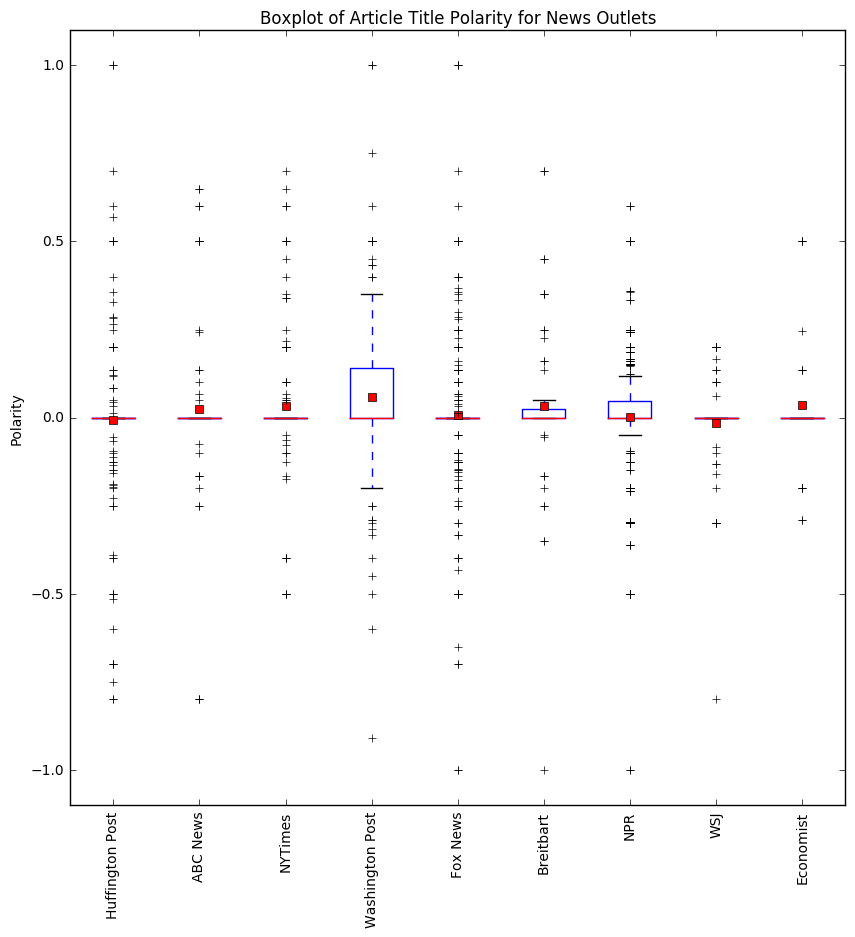

In [45]:
#Plot the article title polarity values for each news outlet 
polar_to_plot = [huff_polar, abc_polar, nyt_polar, wash_polar, fox_polar, breit_polar, npr_polar, wsj_polar, econ_polar]
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)

bp = ax.boxplot(polar_to_plot, showmeans=True)
pylab.ylim([-1.1,1.1])
ax.set_title("Boxplot of Article Title Polarity for News Outlets")
ax.set_ylabel('Polarity')
ax.set_xticklabels( ('Huffington Post', 'ABC News', 'NYTimes', 'Washington Post', 'Fox News', 'Breitbart', 'NPR', 'WSJ', 'Economist') )
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

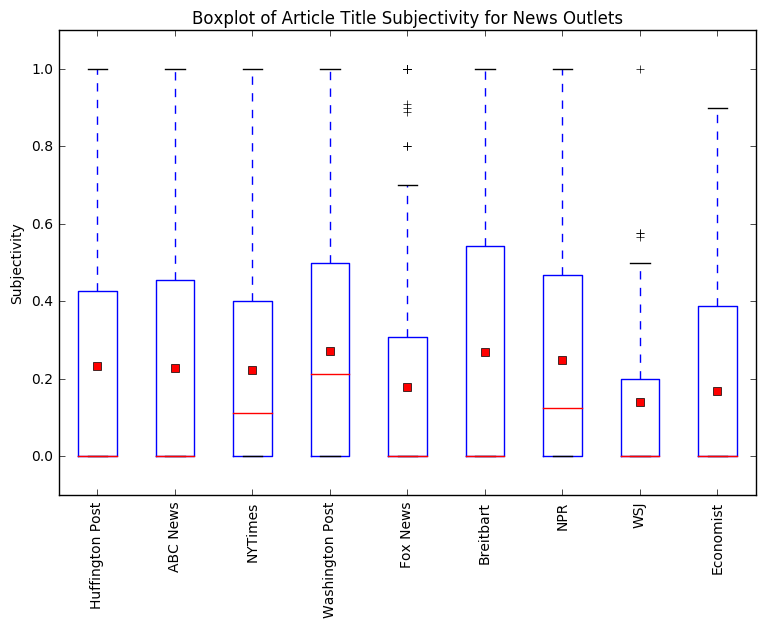

In [46]:
#Plot the article title subjectivity values for each news outlet 
subj_to_plot = [huff_subj, abc_subj, nyt_subj, wash_subj, fox_subj, breit_subj, npr_subj, wsj_subj, econ_subj]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

bp = ax.boxplot(subj_to_plot, showmeans=True)
pylab.ylim([-0.1,1.1])
ax.set_title("Boxplot of Article Title Subjectivity for News Outlets")
ax.set_ylabel('Subjectivity')
ax.set_xticklabels( ('Huffington Post', 'ABC News', 'NYTimes', 'Washington Post', 'Fox News', 'Breitbart', 'NPR', 'WSJ', 'Economist') )
plt.xticks(rotation=90)

In [47]:
def noun_polarity(total_list):

    noun_phrases = []
    for title in total_list:
        blob = TextBlob(title)
        noun_phrases.extend(blob.noun_phrases)
    
    noun_polarity = []
    for noun in noun_phrases:
        blob = TextBlob(noun)
        noun_polarity.append(blob.sentiment.polarity)
    
    return noun_polarity

In [48]:
huff_noun_pol = noun_polarity(huffpost_titles)
abc_noun_pol = noun_polarity(abc_titles)
economist_noun_pol = noun_polarity(econ_titles)
fox_noun_pol = noun_polarity(fox_titles)
npr_noun_pol = noun_polarity(npr_titles)
nytimes_noun_pol = noun_polarity(nyt_titles)
washington_noun_pol = noun_polarity(washington_titles)
wsj_noun_pol = noun_polarity(wsj_titles)
breitbart_noun_pol = noun_polarity(breit_titles)

In [49]:
def polarity_levels(total_pol, name, typenews):
    pos_pol = [i for i in total_pol if i > 0]
    pos_pol = str(len(pos_pol))
    neu_pol = [i for i in total_pol if i == 0]
    neu_pol = str(len(neu_pol))
    neg_pol = [i for i in total_pol if i < 0]
    neg_pol = str(len(neg_pol))
    all_pol = [name, neg_pol, pos_pol, typenews]
    
    return all_pol

In [50]:
hp = polarity_levels(huff_noun_pol, "Huffington Post", "Liberal")
ab = polarity_levels(abc_noun_pol, "ABC News", "Liberal")
ec = polarity_levels(economist_noun_pol, "Economist", "Other")
fo = polarity_levels(fox_noun_pol, "Fox", "Conservative")
np = polarity_levels(npr_noun_pol, "NPR", "Other")
ny = polarity_levels(nytimes_noun_pol, "NYTimes", "Liberal")
wa = polarity_levels(washington_noun_pol, "Washington Post", "Liberal")
ws = polarity_levels(wsj_noun_pol, "WSJ", "Other")
br = polarity_levels(breitbart_noun_pol, "Breitbart", "Conservative")

In [51]:
df = pd.DataFrame([hp, ab, ec, fo, np, ny, wa, ws, br])
df

,0,1,2,3
0,Huffington Post,31,29,Liberal
1,ABC News,10,9,Liberal
2,Economist,1,3,Other
3,Fox,23,28,Conservative
4,NPR,47,61,Other
5,NYTimes,7,11,Liberal
6,Washington Post,11,21,Liberal
7,WSJ,9,11,Other
8,Breitbart,4,11,Conservative


In [14]:
df_conservative = df[df[3] == "Conservative"]
df_conservative

,0,1,2,3
3,Fox,23,28,Conservative
8,Breitbart,4,11,Conservative


In [15]:
df_other = df[df[3] == "Other"]
df_other

,0,1,2,3
2,Economist,1,3,Other
4,NPR,47,61,Other
7,WSJ,9,11,Other


In [16]:
df_liberal = df[df[3] == "Liberal"]
df_liberal

,0,1,2,3
0,Huffington Post,31,29,Liberal
1,ABC News,10,9,Liberal
5,NYTimes,7,11,Liberal
6,Washington Post,11,21,Liberal


In [17]:
lib1 = str(sum(df_liberal[1].astype(int)))
con1 = str(sum(df_conservative[1].astype(int)))
oth1 = str(sum(df_other[1].astype(int)))


In [18]:
lib2 = str(sum(df_liberal[2].astype(int)))
con2 = str(sum(df_conservative[2].astype(int)))
oth2 = str(sum(df_other[2].astype(int)))
total_other = [oth1, oth2]
total_con = [con1, con2]
total_lib = [lib1, lib2]

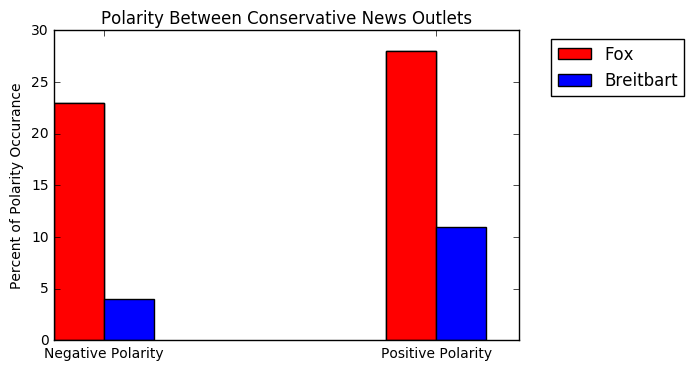

In [33]:
ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='b')
rects1 = ax.bar(ind, df_conservative.iloc[0, 1:3].values, width, color='r')

rects2 = ax.bar(ind+width, df_conservative.iloc[1, 1:3].values, width)

ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0]), ('Fox', 'Breitbart'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

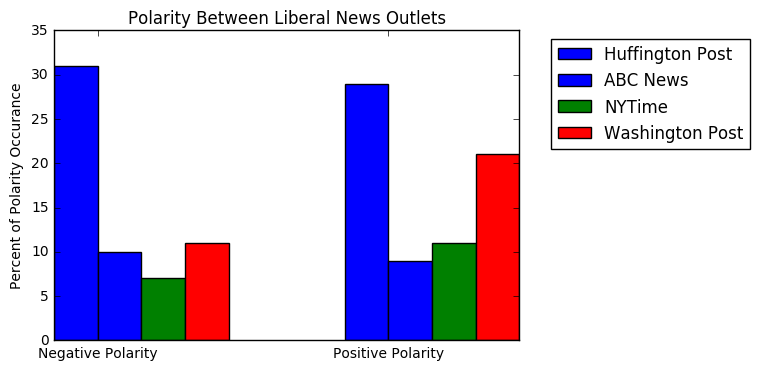

In [34]:
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, df_liberal.iloc[0, 1:3].values, width, color='b')


rects2 = ax.bar(ind+width, df_liberal.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_liberal.iloc[2, 1:3].values, width, color = 'g')

rects4 = ax.bar(ind+width+width+width, df_liberal.iloc[3, 1:3].values, width, color = 'r')

ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Liberal News Outlets")
ax.set_xticklabels( ('Negative Polarity',  'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('Huffington Post', 'ABC News', 'NYTime', 'Washington Post'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


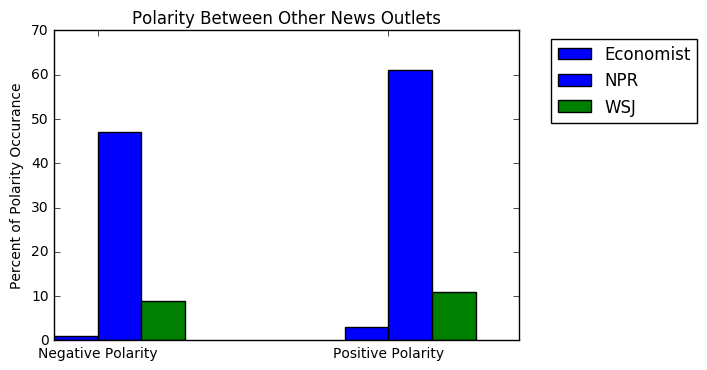

In [35]:
#ind = np.arange(3)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, df_other.iloc[0, 1:3].values, width, color='b')

rects2 = ax.bar(ind+width, df_other.iloc[1, 1:3].values, width)
rects3 = ax.bar(ind+width+width, df_other.iloc[2, 1:3].values, width, color = 'g')


ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Economist', 'NPR', 'WSJ'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

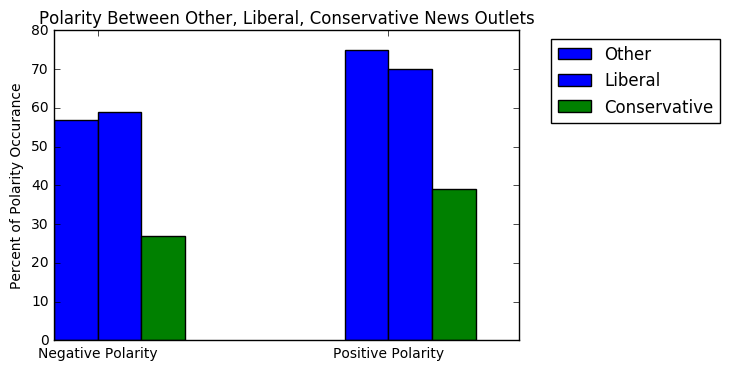

In [36]:
#ind = np.arange(2)
width = 0.15
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, total_other, width, color='b')

rects2 = ax.bar(ind+width, total_lib, width)
rects3 = ax.bar(ind+width+width, total_con, width, color = 'g')


ax.set_ylabel('Percent of Polarity Occurance')
ax.set_xticks(ind+width)
ax.set_title("Polarity Between Other, Liberal, Conservative News Outlets")
ax.set_xticklabels( ('Negative Polarity', 'Positive Polarity') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Other', 'Liberal', 'Conservative'), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
